In [1]:
from smlm_dl import dataset, zernike
from importlib import reload
import skimage
import numpy as np

d:\github\smlm-dl\smlm_dl\dataset.py:423: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


11:	 [id = 11.000,], [A = 922.189,], [bg = 79.833,], [x = 8.614,], [y = 5.374,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
5:	 [id = 5.000,], [A = 1905.129,], [bg = 8.382,], [x = 3.611,], [y = -0.409,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
10:	 [id = 10.000,], [A = 1433.672,], [bg = 85.292,], [x = -1.543,], [y = -6.078,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
12:	 [id = 12.000,], [A = 819.833,], [bg = 37.794,], [x = 1.166,], [y = 0.216,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
14:	 [id = 14.000,], [A = 1351.531,], [bg = 1.896,], [x = 2.569,], [y = 0.064,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
7:	 [id = 7.000,], [A = 1232.388,], [bg = 75.740,], [x = -1.360,], [y = 9.666,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
1:	 [id = 1.000,], [A = 1784.770,], [bg = 35.660,], [x = -7.458,], [y = -1.894,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
6:	 [id = 6.000,], [A = 1971.554,], [bg = 74.511,], [x = 4.620,], [y = 6.479,], 

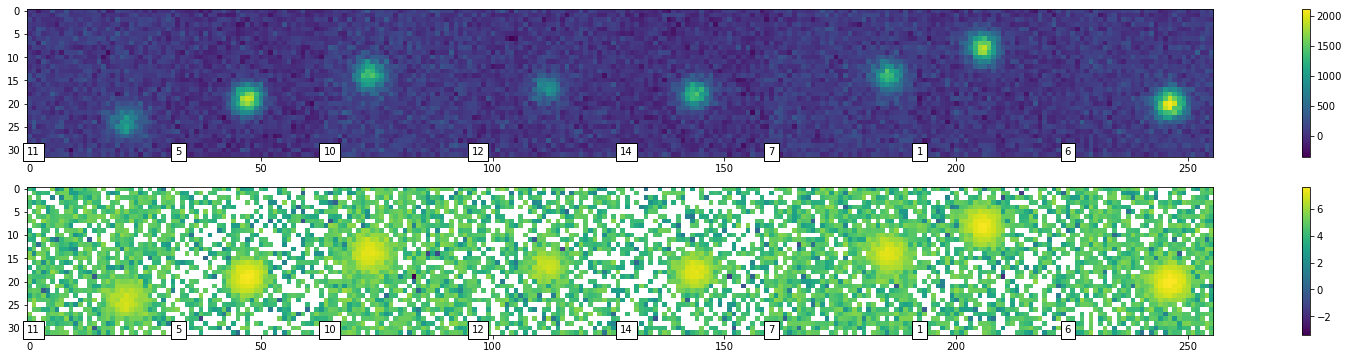

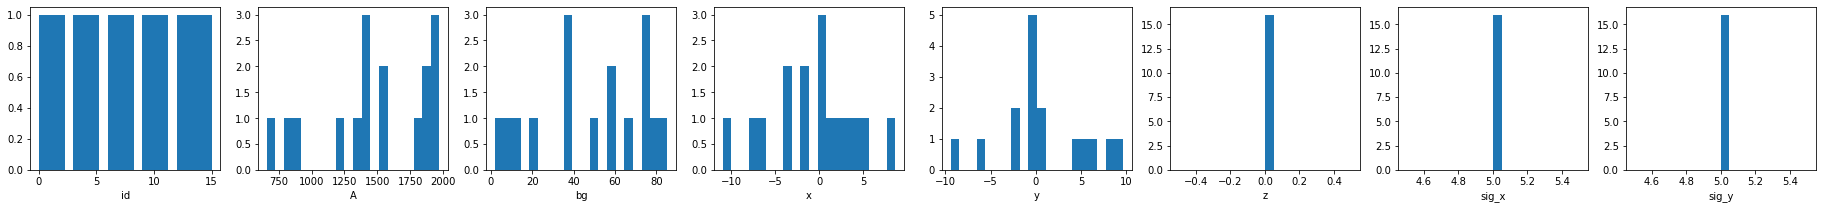

In [2]:
reload(dataset)
a = dataset.Gaussian2DPSFDataset(length=16,)# augmentations={})
dataset.inspect_images(a)

13:	 [id = 13.000,], [A = 1597.153,], [bg = 43.118,], [x = 9.437,], [y = -4.788,], [z = 0.000,],
12:	 [id = 12.000,], [A = 1703.091,], [bg = 98.665,], [x = 5.593,], [y = 1.678,], [z = 0.000,],
3:	 [id = 3.000,], [A = 1137.073,], [bg = 21.742,], [x = -9.017,], [y = -2.705,], [z = 0.000,],
14:	 [id = 14.000,], [A = 1151.476,], [bg = 28.228,], [x = 0.734,], [y = 4.525,], [z = 0.000,],
4:	 [id = 4.000,], [A = 915.450,], [bg = 71.340,], [x = -6.888,], [y = 3.991,], [z = 0.000,],
10:	 [id = 10.000,], [A = 1165.092,], [bg = 65.174,], [x = -0.568,], [y = -7.912,], [z = 0.000,],
1:	 [id = 1.000,], [A = 816.149,], [bg = 67.343,], [x = -3.254,], [y = -9.679,], [z = 0.000,],
8:	 [id = 8.000,], [A = 1016.330,], [bg = 27.045,], [x = 3.774,], [y = 9.346,], [z = 0.000,],


d:\github\smlm-dl\smlm_dl\zernike.py:84: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(-y_lim, y_lim)


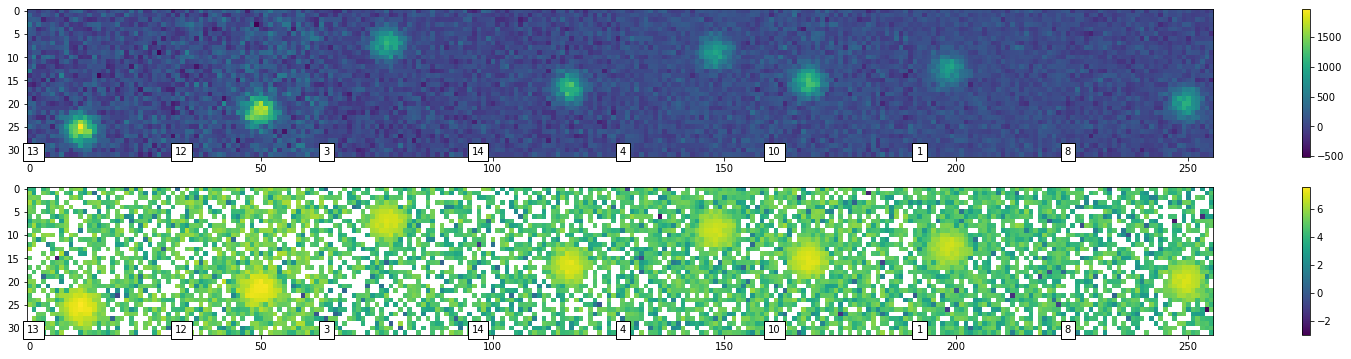

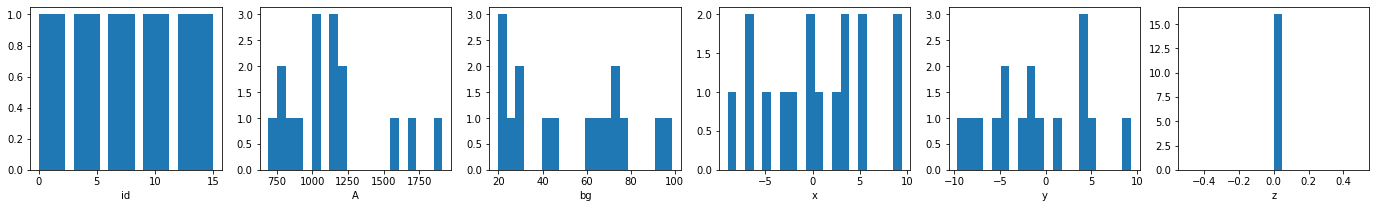

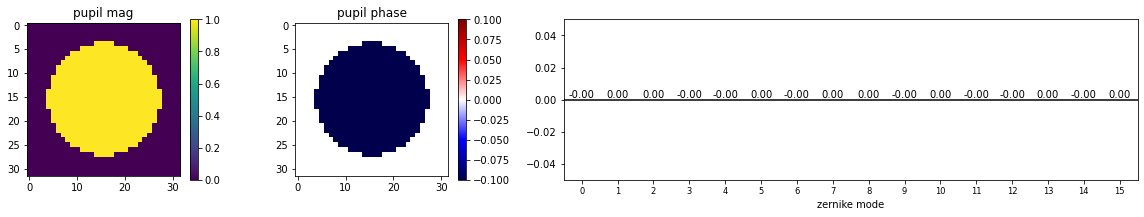

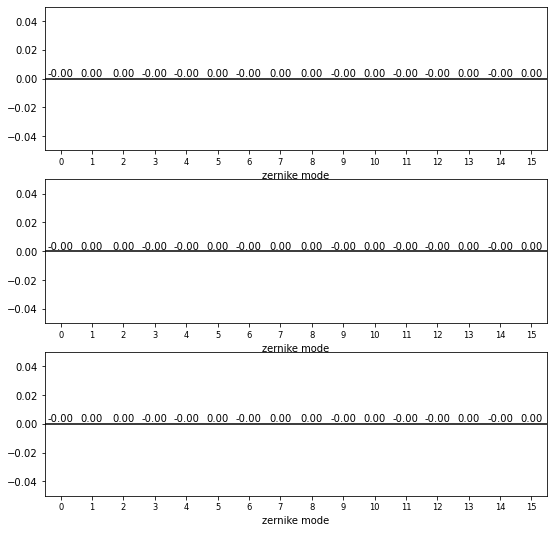

In [3]:
reload(dataset)
reload(zernike)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    out_size=(32,32),
                                    psf_zerns={0:0},#, 1:1, 2:0.2, 4:1, 5:2, 7:-2, 9:3},
                                    noise_params={},
                                    augmentations={dataset.Augmentation.NOISE_GAUSSIAN:0.1},
                                    normalize=False) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)



import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(9, 9))
zernike.plot_zernike_coeffs(axes[0], zernike.fit_zernike_from_pupil(a.pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(a.pupil), np.abs(a.pupil) <=0)
corrected_pupil = np.abs(a.pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[1], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(corrected_pupil), np.abs(corrected_pupil) <=0)
corrected_pupil = np.abs(corrected_pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[2], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

13:	 [id = 13.000,], [A = 881.562,], [bg = 84.563,], [x = -5.933,], [y = -7.846,], [z = 0.000,],
14:	 [id = 14.000,], [A = 1711.162,], [bg = 48.184,], [x = -0.898,], [y = 1.469,], [z = 0.000,],
5:	 [id = 5.000,], [A = 636.801,], [bg = 74.541,], [x = -7.663,], [y = -9.721,], [z = 0.000,],
0:	 [id = 0.000,], [A = 1468.042,], [bg = 17.936,], [x = -1.460,], [y = 6.677,], [z = 0.000,],
8:	 [id = 8.000,], [A = 926.734,], [bg = 77.298,], [x = 2.581,], [y = 9.820,], [z = 0.000,],
4:	 [id = 4.000,], [A = 1085.338,], [bg = 1.112,], [x = -7.174,], [y = -0.340,], [z = 0.000,],
2:	 [id = 2.000,], [A = 1982.710,], [bg = 16.921,], [x = -4.853,], [y = 9.414,], [z = 0.000,],
3:	 [id = 3.000,], [A = 1032.693,], [bg = 40.005,], [x = 0.038,], [y = -7.937,], [z = 0.000,],


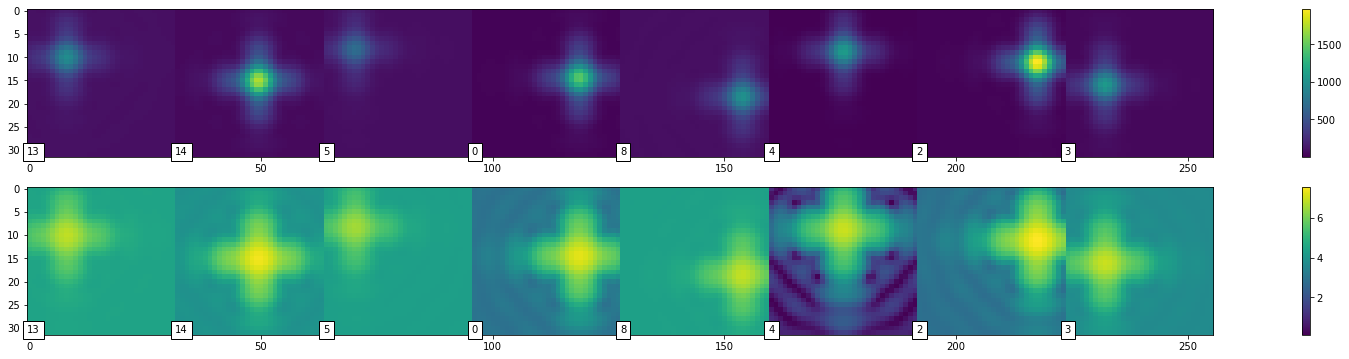

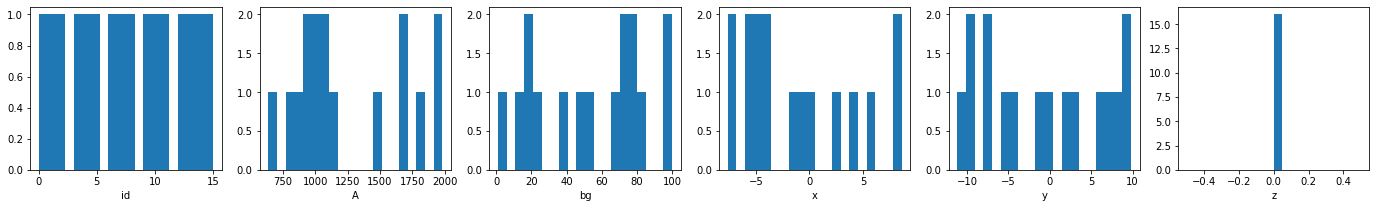

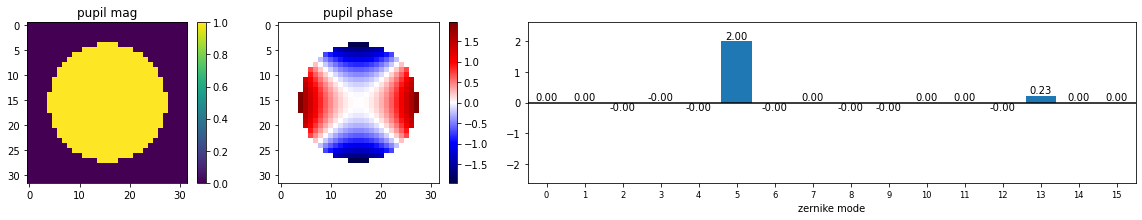

In [4]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(length=16,
                                      psf_zerns={1:0, 5:2},
                                      noise_params={},
                                      normalize=False,
                                     # psf_params={'pupil_scale':1},
                                     ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)

11:	 [id = 11.000,], [A = 1906.686,], [bg = 16.097,], [x = 7.189,], [y = 0.601,], [z = 9.539,],
9:	 [id = 9.000,], [A = 1237.462,], [bg = 97.212,], [x = 3.928,], [y = -9.154,], [z = -8.470,],
2:	 [id = 2.000,], [A = 1380.110,], [bg = 78.658,], [x = -3.133,], [y = 10.734,], [z = -0.957,],
7:	 [id = 7.000,], [A = 714.538,], [bg = 86.867,], [x = 2.117,], [y = -3.472,], [z = 9.153,],
1:	 [id = 1.000,], [A = 1075.548,], [bg = 32.520,], [x = -0.199,], [y = -8.945,], [z = -4.744,],
13:	 [id = 13.000,], [A = 1397.784,], [bg = 29.955,], [x = -8.303,], [y = -11.159,], [z = -8.421,],
5:	 [id = 5.000,], [A = 1557.221,], [bg = 83.887,], [x = 3.618,], [y = 6.147,], [z = -1.806,],
4:	 [id = 4.000,], [A = 1200.780,], [bg = 3.752,], [x = 3.599,], [y = 10.630,], [z = -6.568,],


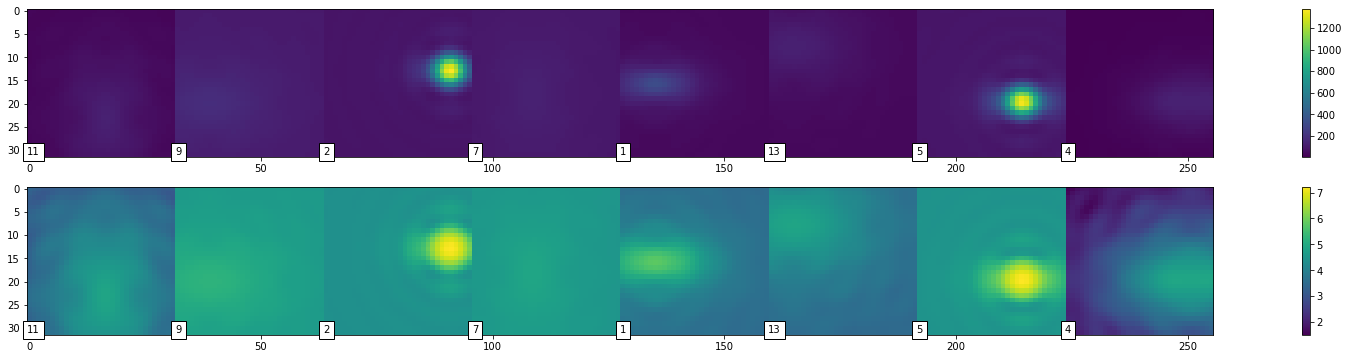

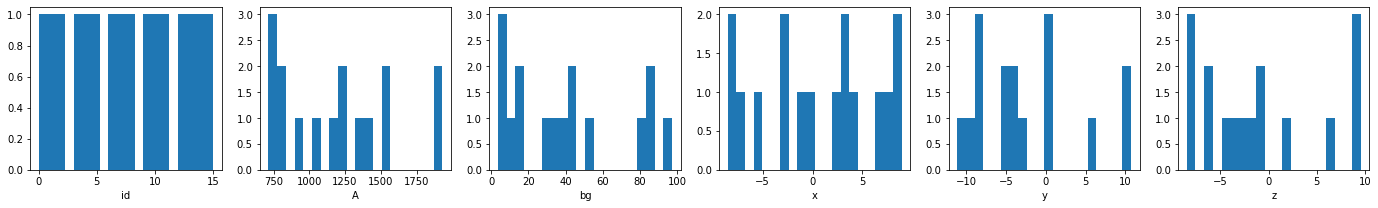

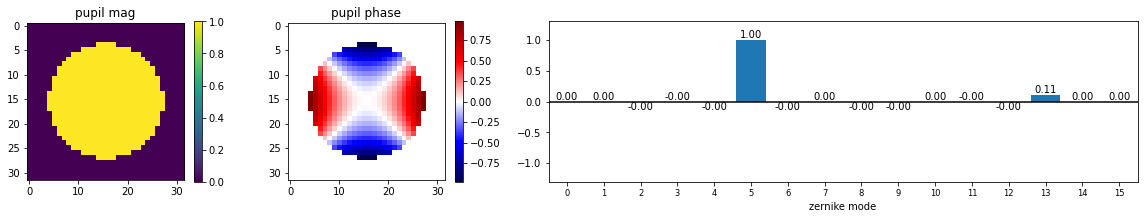

In [5]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    psf_params={'z':[-10,10]},
                                    psf_zerns={1:0, 5:1}, noise_params={}) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)

8:	 [id = 8.000,], [A = 1136.027, 1970.143, 793.513, 1606.509, 1534.742, 1698.171, 1561.223, 1589.970,], [bg = 14.558,], [x = 0.679, -10.534, 20.996, 7.024, -10.472, -2.293, 19.155, 3.554,], [y = 12.052, -9.474, 3.301, 10.438, 6.265, -16.961, -0.881, -2.376,], [z = 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,],
12:	 [id = 12.000,], [A = 1717.893, 848.154, 1994.350, 1995.010, 1799.760, 790.987, 716.758, 1294.891,], [bg = 89.847,], [x = 1.278, -4.141, 3.173, 1.939, -11.472, -16.632, -5.141, -12.686,], [y = -3.782, -15.199, -3.662, 9.388, -13.164, -19.109, 5.844, -19.247,], [z = 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,],
14:	 [id = 14.000,], [A = 883.605, 1188.531, 1740.240, 1347.769, 1599.643, 1745.

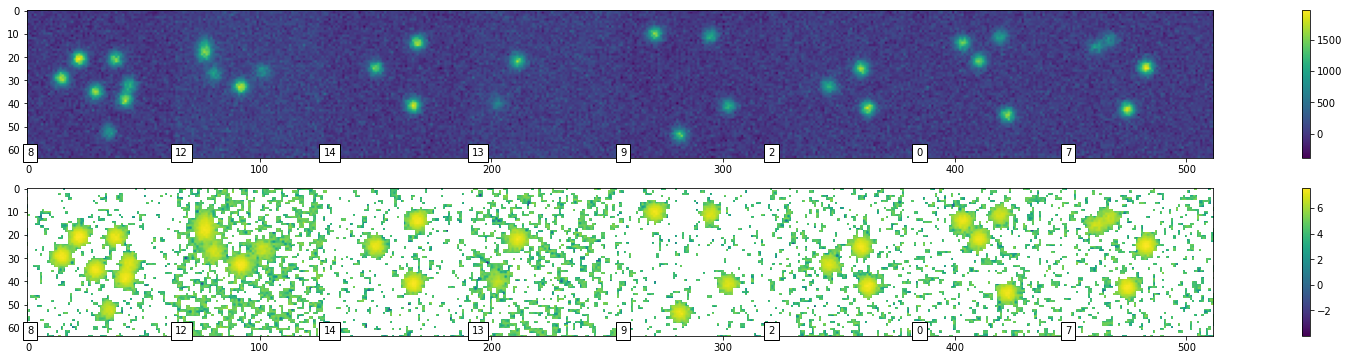

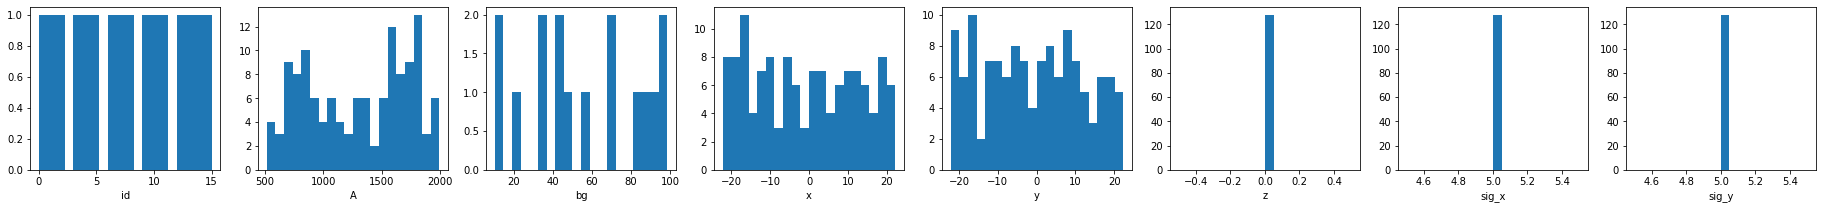

In [6]:
reload(dataset)

a = dataset.Gaussian2DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, )
dataset.inspect_images(a)

13:	 [id = 13.000,], [A = 1276.948, 587.253, 861.402, 1542.942, 1575.128, 1541.242, 774.360, 762.915,], [bg = 45.218,], [x = 6.106, -5.862, -19.548, 20.162, -10.412, -17.648, -11.580, 13.163,], [y = 15.942, -5.354, -15.840, 20.018, -22.257, 3.672, 1.151, 5.416,], [z = 9.695, 7.662, -6.353, 1.395, -8.304, 7.342, -5.060, -4.593,],
8:	 [id = 8.000,], [A = 1504.847, 858.938, 1987.306, 1423.308, 1727.155, 1563.681, 1678.041, 881.366,], [bg = 3.711,], [x = -20.009, -7.043, -16.061, 0.385, -2.098, 3.243, -21.981, 11.267,], [y = 16.202, 0.969, -8.999, 8.786, -19.160, -12.759, 12.918, 17.795,], [z = 8.988, 3.612, -2.934, -9.827, -9.536, 0.018, -0.535, 3.842,],
5:	 [id = 5.000,], [A = 536.429, 996.436, 1937.058, 513.222, 1784.660, 580.282, 1118.337, 1344.513,], [bg = 95.211,], [x = 20.792, -10.301, -18.956, 6.563, -4.887, 13.054, 20.345, 9.697,], [y = -1.456, 20.741, -2.216, 9.283, -15.488, 22.039, -9.213, -4.451,], [z = 7.288, -4.337, -0.543, -2.883, 9.781, 3.601, 3.614, -0.013,],
7:	 [id = 7.0

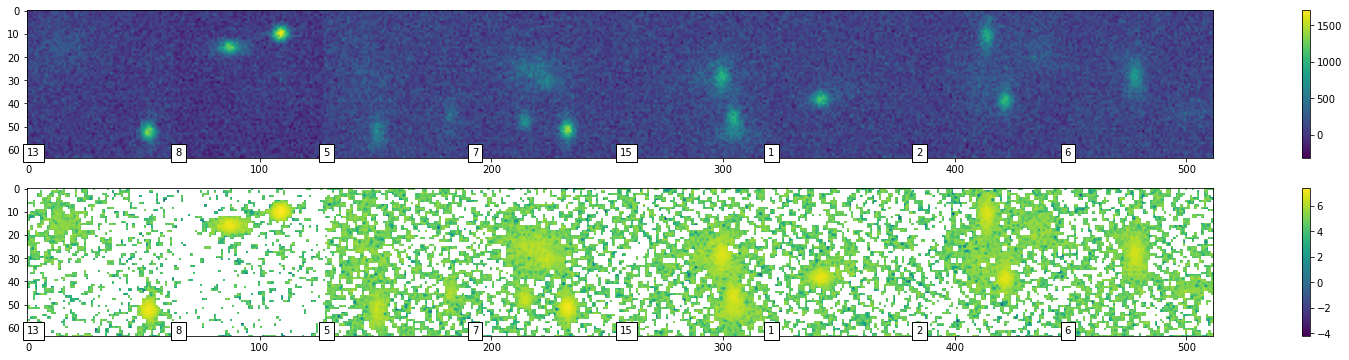

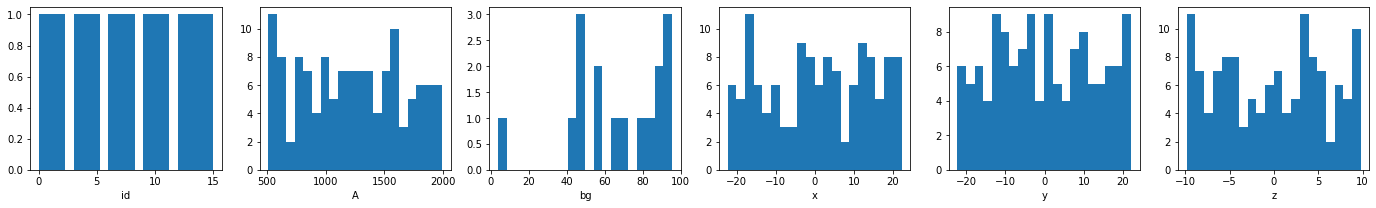

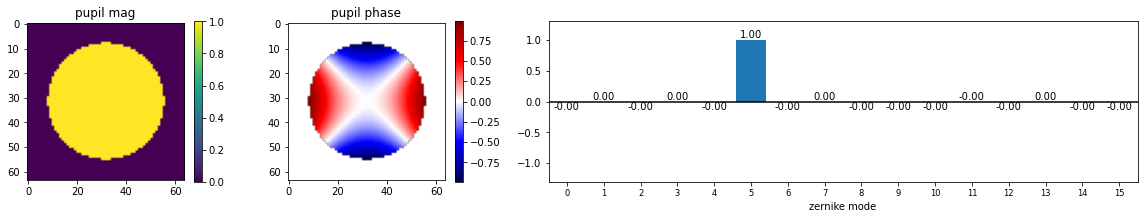

In [7]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(out_size=(64, 64), length=(16,8),
                                    psf_params={'z':[-10,10]},
                                    dropout_p=0.5, psf_zerns={1:0, 5:1}, ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())
for key, val in a.params.items():
    print(val.shape)

[-31.5 -30.5 -29.5 -28.5 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5
 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5
  -7.5  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5
   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5
  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5
  28.5  29.5  30.5  31.5]
41:	 [id = 41.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = 9.500,],
15:	 [id = 15.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -16.500,],
28:	 [id = 28.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -3.500,],
46:	 [id = 46.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = 14.500,],
5:	 [id = 5.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -26.500,],
30:	 [id = 30.000,], [A = 1.000,], [bg = 0.000,], [x = 0.000,], [y = 0.000,], [z = -1.500,],
56:	 [id = 56.000,], [A = 1.000,], [bg = 0.000,], [x

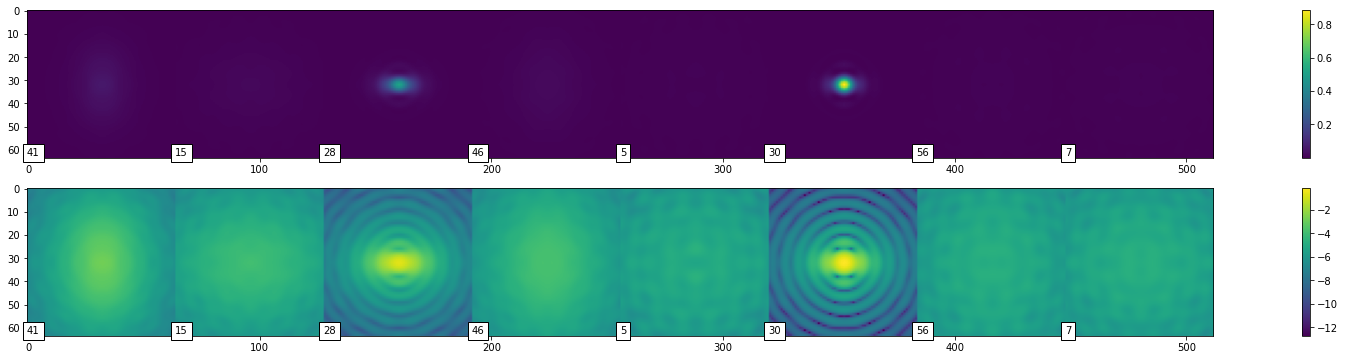

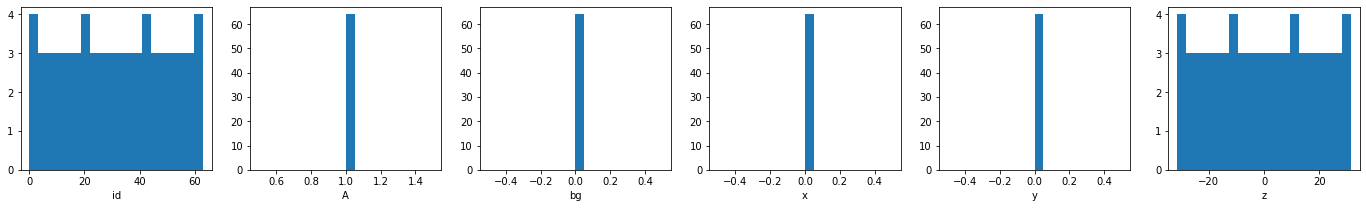

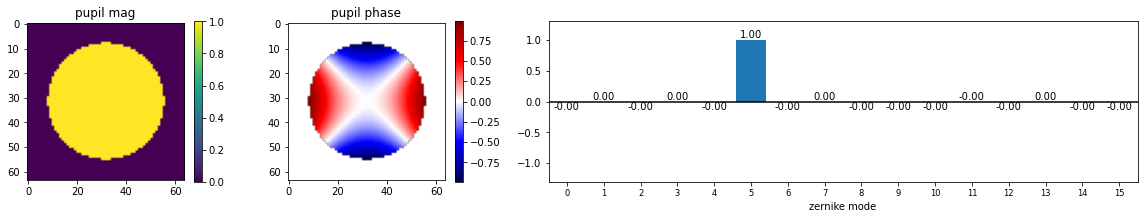

In [8]:
reload(dataset)

length = 64
image_params_preset = {'A': np.ones(length),
                       'x': np.zeros(length),
                       'y': np.zeros(length),
                       'bg': np.zeros(length),
                       'z': np.linspace(-31.5, 31.5, length)}
print(image_params_preset['z'])

a = dataset.FourierOpticsPSFDataset(out_size=(64, 64), length=(length,1),
                                    # psf_params={'z':[-10,10]},
                                    dropout_p=0, psf_zerns={1:0, 5:1},
                                    image_params_preset=image_params_preset,
                                    noise_params ={}
                                   ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())

2:	 [id = 2.000,], [A = 0.708,], [bg = 9.425,], [x = 1.908,], [y = -4.355,], [z = 0.000,],
5:	 [id = 5.000,], [A = 1.850,], [bg = 7.699,], [x = 4.358,], [y = 5.521,], [z = 0.000,],
0:	 [id = 0.000,], [A = 1.611,], [bg = 7.932,], [x = -0.595,], [y = 1.594,], [z = 0.000,],
3:	 [id = 3.000,], [A = 1.873,], [bg = 8.912,], [x = -3.054,], [y = -9.022,], [z = 0.000,],
6:	 [id = 6.000,], [A = 1.506,], [bg = 1.276,], [x = -4.589,], [y = -2.119,], [z = 0.000,],
1:	 [id = 1.000,], [A = 1.550,], [bg = 5.337,], [x = -2.377,], [y = 5.993,], [z = 0.000,],
7:	 [id = 7.000,], [A = 0.585,], [bg = 8.085,], [x = -0.444,], [y = 3.112,], [z = 0.000,],
4:	 [id = 4.000,], [A = 1.981,], [bg = 7.982,], [x = 2.770,], [y = -1.247,], [z = 0.000,],


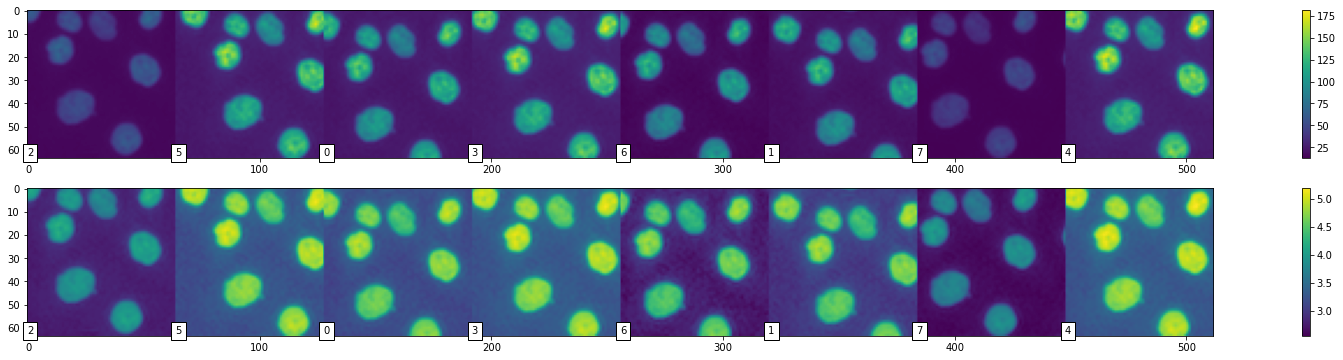

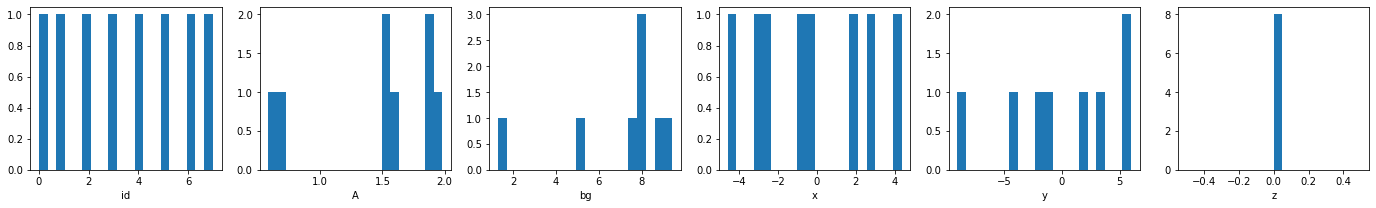

In [9]:
reload(dataset)

a = dataset.SingleImageDataset(skimage.data.human_mitosis()[20:, 20:], out_size=(64,64), length=8,
                               image_params={'x':[-5, +5],
                                             'y':[-10, +10],
                                           # 'conv':np.ones((3,3)),
                                          },
                               noise_params={}, augmentations={}, normalize=False)
dataset.inspect_images(a)